# Обработка изображений. Часть 3.
Данные, необходимые для этого модуля:
* cat-bw.png
* cat-color.png
* coin.png

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

## Загрузка ЧБ изображения

In [2]:
img = imageio.imread('cat-bw.png')
img = img[:,:,0].astype(np.float32) / 255.
print(img.shape)

(667, 730)


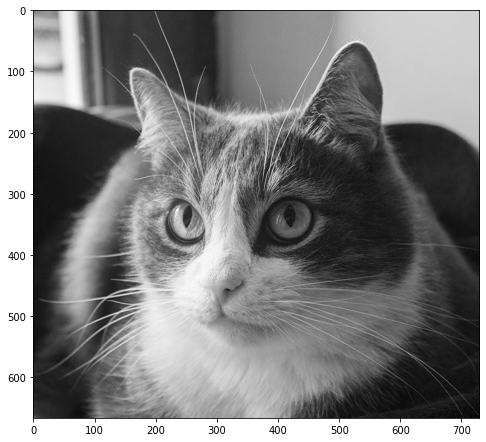

In [3]:
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='gray')

## Оконная функция (функция фильтра)
Фильтр производит размытие (box blur)

In [4]:
def my_filter(x):
    # Box blur
    return np.mean(x)

## Оконная обработка изображения (фильтрация)

In [6]:
win_size = (11, 11) # размер окна

#размер выходной картинки с нулевыми значениями
out_img = np.zeros(
    (img.shape[0] - win_size[0] + 1,
     img.shape[1] - win_size[1] + 1), 
     dtype=np.float32)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img[i:i+win_size[0], j:j+win_size[1]]
        out_img[i,j] = my_filter(x)

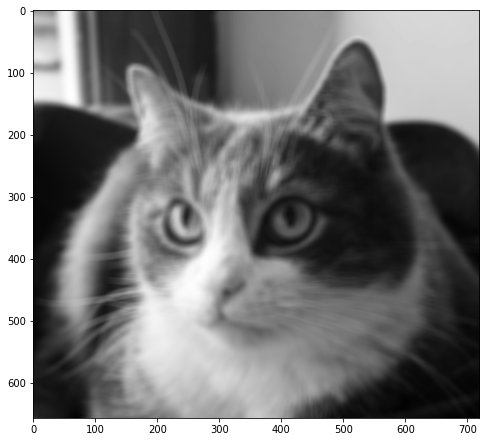

In [7]:
plt.figure(figsize=(8, 8))
plt.imshow(out_img, cmap='gray')

## Создание линейного фильтра (ядро свёртки)

In [8]:
# Box blur
if 0:
    win_size = (11, 11)
    w = np.ones(win_size, dtype=np.float32)
    w = w / np.sum(w)

# Gaussian blur
if 1:
    win_size = (11, 11)
    sigma = 3
    w = np.zeros(win_size, dtype=np.float32)
    for i in range(w.shape[0]):
        for j in range(w.shape[1]):
            w[i,j] = np.exp(-(i-w.shape[0]//2)**2 / sigma**2 / 2 
                            -(j-w.shape[1]//2)**2 / sigma**2 / 2)
    w = w / np.sum(w)

[[0.00125904 0.0020758  0.00306252 0.00404311 0.00477637 0.00504924
  0.00477637 0.00404311 0.00306252 0.0020758  0.00125904]
 [0.0020758  0.00342242 0.00504924 0.00666597 0.00787491 0.00832479
  0.00787491 0.00666597 0.00504924 0.00342242 0.0020758 ]
 [0.00306252 0.00504924 0.00744935 0.00983457 0.01161817 0.01228189
  0.01161817 0.00983457 0.00744935 0.00504924 0.00306252]
 [0.00404311 0.00666597 0.00983457 0.01298353 0.01533823 0.01621447
  0.01533823 0.01298353 0.00983457 0.00666597 0.00404311]
 [0.00477637 0.00787491 0.01161817 0.01533823 0.01811998 0.01915513
  0.01811998 0.01533823 0.01161817 0.00787491 0.00477637]
 [0.00504924 0.00832479 0.01228189 0.01621447 0.01915513 0.02024942
  0.01915513 0.01621447 0.01228189 0.00832479 0.00504924]
 [0.00477637 0.00787491 0.01161817 0.01533823 0.01811998 0.01915513
  0.01811998 0.01533823 0.01161817 0.00787491 0.00477637]
 [0.00404311 0.00666597 0.00983457 0.01298353 0.01533823 0.01621447
  0.01533823 0.01298353 0.00983457 0.00666597 0.00

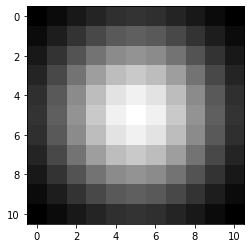

In [9]:
print(w)
plt.imshow(w, cmap='gray')

## Свёртка изображения (линейная фильтрация)
`%%time` - измерение времени работы ячейки ноутбука

In [10]:
%%time

out_img = np.zeros(
    (img.shape[0] - w.shape[0] + 1,
     img.shape[1] - w.shape[1] + 1), 
     dtype=np.float32)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img[i:i+w.shape[0], j:j+w.shape[1]]

        out_img[i,j] = np.sum(w * x)

CPU times: user 8.63 s, sys: 18.4 ms, total: 8.65 s
Wall time: 8.67 s


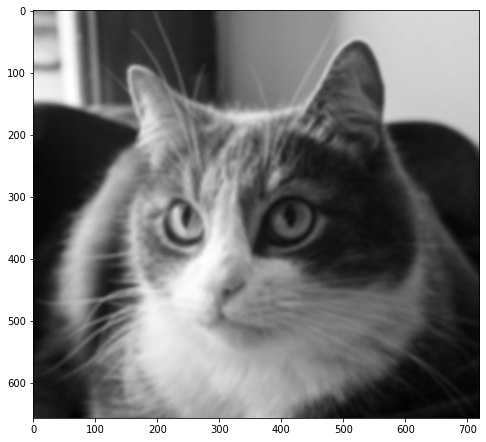

In [11]:
plt.figure(figsize=(8, 8))
plt.imshow(np.abs(out_img), cmap='gray')

## Свёртка через библиотеку scipy.signal
На самом деле, то, что мы делаем, называется "корреляция". Настоящая свёртка отражает ядро свёртки по всем измерениям. Но зачастую под свёрткой понимают именно корреляцию. А в случае симметричного ядра свёртки они эквивалентны.

In [12]:
import scipy.signal

In [13]:
%%time

out_img = scipy.signal.correlate2d(img, w, mode='valid')

CPU times: user 123 ms, sys: 904 µs, total: 124 ms
Wall time: 167 ms


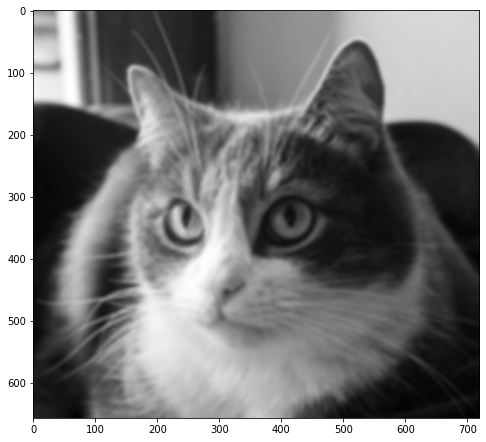

In [14]:
plt.figure(figsize=(8, 8))
plt.imshow(np.abs(out_img), cmap='gray')

## Загрузка цветного изображения

In [15]:
img = imageio.imread('cat-color.png')
img = img.astype(np.float32) / 255.
print(img.shape)

(667, 730, 3)


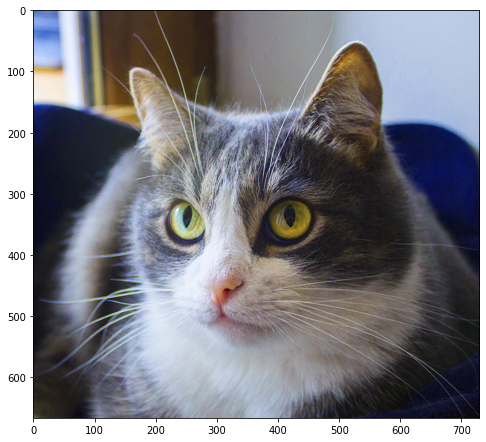

In [16]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

## Свёртка цветного изобрежения
Двумерная свёртка применяется поканально.

In [17]:
%%time

out_img = []
for c in range(3):
    out_img.append(scipy.signal.correlate2d(img[:,:,c], w, mode='valid'))
out_img = np.stack(out_img, axis=2)

CPU times: user 450 ms, sys: 19 ms, total: 469 ms
Wall time: 386 ms


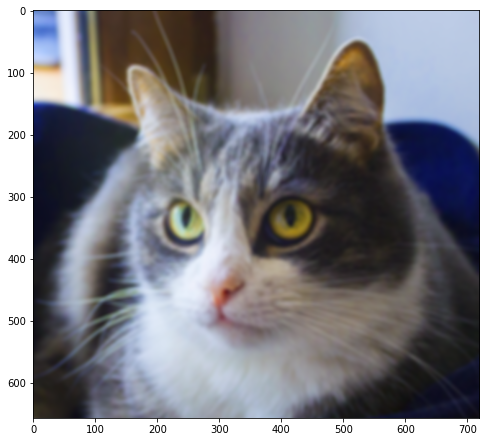

In [18]:
plt.figure(figsize=(8, 8))
plt.imshow(out_img)